# Importing Packages

In [136]:
# Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import json
import requests

# to allow plots appear in the jupyter notebook
% matplotlib inline

# Data Gathering

**Twitter Archive Enhanced File**

In [137]:
#Reading a csv file containing we rate dogs account tweets in data frame

archive_df=pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


# Image Prediction File

In [138]:
#we'are going to scrap the tsv file containing image predictions and then print out the head of the dataset

link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

get_response= requests.get(link)

with open('image-predictions.tsv', mode='wb') as f:
    f.write(get_response.content)


image_prediction_df=pd.read_csv('image-predictions.tsv', sep='\t')

image_prediction_df.head(10)

#Refererence:
#https://realpython.com/python-requests/

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## JSON File

In [139]:
#reading tweet_json file and create a data frame with id, favourite and retweet counts
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html

df= pd.read_json('tweet-json.txt', orient='records', lines=True)

tweet_counts=df[['favorite_count', 'retweet_count', 'id']]

tweet_counts.tail(10)

,favorite_count,retweet_count,id
2344,115,61,666058600524156928
2345,304,146,666057090499244032
2346,448,261,666055525042405380
2347,1253,879,666051853826850816
2348,136,60,666050758794694657
2349,111,41,666049248165822465
2350,311,147,666044226329800704
2351,128,47,666033412701032449
2352,132,48,666029285002620928
2353,2535,532,666020888022790149


# Assessing Data

# Part 1

* First of all, we will assess data **visually** by printing out the dataset and uncover any issues
  in archive_df, image_prediction_df, tweet_counts

In [140]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [141]:
 image_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [142]:
tweet_counts

,favorite_count,retweet_count,id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


# Assessing Part 2

* after we made a visual assessment on the dataset, it's time to make a programmatic assessment
* I'll Start the programmatic assesment with ***1. archive_df***

In [143]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [144]:
archive_df.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Penny              10
Lola               10
Tucker             10
Bo                  9
Winston             9
the                 8
Sadie               8
Toby                7
Bailey              7
an                  7
Buddy               7
Daisy               7
Oscar               6
Leo                 6
Jax                 6
Koda                6
Stanley             6
Jack                6
Scout               6
Milo                6
Bella               6
Dave                6
Rusty               6
Oakley              5
                 ... 
Alfy                1
Mojo                1
Bruiser             1
Dietrich            1
Rolf                1
Wafer               1
Ike                 1
Tove                1
Trigger             1
Hamrick             1
Snoopy              1
Karl                1
Pepper              1
Napolean            1
Fiji      

In [145]:
archive_df.tweet_id.duplicated().sum()

0

In [146]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [147]:
#Not Retweeted Tweets (Original Tweets)
archive_df.retweeted_status_id.isnull().sum()

2175

In [148]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [149]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [150]:
(archive_df.rating_denominator != 10).sum()

23

In [151]:
(archive_df.rating_numerator > 20).sum()

24

* most of ratings are >= 10 and <= 20
* I choosen the limit to be 20 and every value exceeds 20 can be considered as a typo or someone is biased towards a certain type of dog so he gave him an extremly high rating or simply an "error".

In [152]:
archive_df.source.describe()

count                                                  2356
unique                                                    4
top       <a href="http://twitter.com/download/iphone" r...
freq                                                   2221
Name: source, dtype: object

In [153]:
archive_df.expanded_urls.describe()

count                                                  2297
unique                                                 2218
top       https://twitter.com/dog_rates/status/833124694...
freq                                                      2
Name: expanded_urls, dtype: object

In [154]:
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [155]:
archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [156]:
archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [157]:
archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [158]:
#checking Tweet text if it may contain decimal points inside the text itself

archive_df[archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")]



#Helpful Resources:

#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.str.contains.html
#https://stackoverflow.com/questions/21923361/how-to-check-a-string-contains-only-digits-and-one-occurrence-of-a-decimal-point
#https://stackoverflow.com/questions/4999064/regex-for-string-contains
#https://cs.lmu.edu/~ray/notes/regex/
#https://stackoverflow.com/questions/14017134/what-is-d-d-in-regex

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


**2. Assessing image_predictions_df**

In [159]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [160]:
image_prediction_df.tweet_id.duplicated().sum()

0

In [161]:
image_prediction_df.jpg_url.duplicated().sum()

66

In [162]:
image_prediction_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [163]:
image_prediction_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [164]:
image_prediction_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

**3. Assessing "tweet_counts" Data Frame**

In [165]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
id                2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [166]:
tweet_counts.id.duplicated().sum()

0

In [167]:
tweet_counts.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [168]:
tweet_counts.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

# Quality Issues:

### archive_df :

* Remove Data contains retweets and leave the original content
* change column timestamp data type to appropriate data type
* change the form of source column to contain only the needed text <br> that describes the source of navigating. <br>
  in other words, Remove the HTML tags that are not needed
* change data type of tweet_id into object
* some inaccurate names like: 'a', 'an', 'the', 'very', 'by', 'al'
* Replace name values which equal to None
* unnecessary columns can be removed
* change the rating_denominator and numerator datatype into float


### image_predictions_df :

* Remove jpg_url duplicated items
* Remove unnecessary columns
* tweet_id is int

### tweet_counts :

* Remove retweets and keep original tweets


# Tidiness Issues:

* The data in 3 tables could be merged into 1 dataset, because they describe one thing
* We have dog stages doggo, floofer, pupper and puppo in 4 different columns instead of one column in **archive_df**


# Data Cleaning:

In [169]:
#First of all, I'll Make a Copy of our original Datasets before starting the process of data cleaning

archive_df_copy= archive_df.copy()
image_prediction_df_copy=image_prediction_df.copy()
tweet_counts_copy=tweet_counts.copy()


#Refrence:
#https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.copy.html

#### 1st Tidiness Issue 

In [170]:
#Define: All 3 Tables will be merged into one dataframe since they'are all containing tweets about the same info
# to make cleaning process easier we will use merge function in pandas


#Code:

#merging on tweet_id column like in SQL Inner Join PK & FK
archive_df_copy = pd.merge(left=archive_df_copy,
                                 right=tweet_counts_copy, left_on='tweet_id', right_on='id', how='inner')

archive_df_copy = archive_df_copy.merge(image_prediction_df_copy, on='tweet_id', how='inner')

#Test:
archive_df_copy.info()

#Reference:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorite_count                2073 

#### 2nd Tidiness Issue 

In [171]:
#Define:
# Dog stages are in 4 seperate columns, we can put the stage of every dog in a single column and remove unnecessary columns

#Code:
#Extracting the 4 stages of dogs from the context using extract function and then create a new column and the stage in it
archive_df_copy['stage']=archive_df_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')

archive_df_copy= archive_df_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#Test:
archive_df_copy.info()
archive_df_copy['stage'].value_counts()

#Refrences:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
id                            2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non

pupper     230
doggo       75
puppo       29
floofer      3
Name: stage, dtype: int64

### Quality Issues in Archive_df
#### 1st Quality Issue 

In [172]:
#Define:
# Remove any data contains retweets from columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
# and keep the null values a.k.a original tweets

#Code:

#Keep Only values which are NaN and remove those who are values
archive_df_copy = archive_df_copy[np.isnan(archive_df_copy.retweeted_status_id)]

archive_df_copy=archive_df_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#Test:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
id                       1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994

#### 2nd Quality Issue

In [173]:
#Define: change datatype of timestamp column from object to datetime


#code:
archive_df_copy.timestamp= pd.to_datetime(archive_df_copy.timestamp)

#Test
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
id                       1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf              

#### 3rd Quality Issue

In [174]:
#Define: Split the markup tags around the text to make it more human readable and more extractable, I'll find a split function
# and then use it

#Code:
archive_df_copy.source=archive_df_copy.source.str.split('>').str[1].str.split('<').str[0]

#Test
archive_df_copy.source.value_counts()

#Reference:
#https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### 4th Quality Issue

In [175]:
#Define: The Datatype of tweet_id should be object since it carries a list of strings not integers,
# this might an error in data entry from spreadsheets like google or ms excel

#Code:
archive_df_copy['tweet_id']= archive_df_copy['tweet_id'].astype(str)

#Test
archive_df_copy.info()


#Reference:
#https://stackoverflow.com/questions/17950374/converting-a-column-within-pandas-dataframe-from-int-to-string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
id                       1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf             

#### 5th Quality Issue

In [176]:
#Define: Remove any unusual names which are most of times are typos, we'll replace it with NaN datatypes


#Code:
archive_df_copy['name']= archive_df_copy['name'].replace('a', np.nan)
archive_df_copy['name']= archive_df_copy['name'].replace('an', np.nan)
archive_df_copy['name']= archive_df_copy['name'].replace('al', np.nan)
archive_df_copy['name']= archive_df_copy['name'].replace('a', np.nan)
archive_df_copy['name']= archive_df_copy['name'].replace('the', np.nan)
archive_df_copy['name']= archive_df_copy['name'].replace('very', np.nan)
archive_df_copy['name']= archive_df_copy['name'].replace('by', np.nan)
archive_df_copy['name']= archive_df_copy['name'].replace('O', np.nan)

#Test:
archive_df_copy['name'].value_counts()

#Reference:
#https://www.programcreek.com/python/example/6575/numpy.nan

None         546
Charlie       11
Cooper        10
Lucy          10
Oliver        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           7
Toby           7
Daisy          7
Jax            6
Bo             6
Stanley        6
Bella          6
Koda           6
Dave           5
Rusty          5
Buddy          5
Louis          5
Scout          5
Chester        5
Leo            5
Bailey         5
Oscar          5
Milo           5
Derek          4
Brody          4
Dexter         4
            ... 
Wafer          1
Luther         1
Godi           1
Schnozz        1
Snickers       1
Fiji           1
Napolean       1
Pepper         1
Kollin         1
Chevy          1
Halo           1
Marlee         1
Jamesy         1
Mairi          1
Sojourner      1
Mike           1
Beemo          1
Cheryl         1
Bubba          1
Lacy           1
Genevieve      1
Jazz           1
Loomis         1
Hurley         1
Stark          1
Hamrick        1
Sunshine       1
Snoopy        

#### 6th Quality Issue

In [177]:
#Define: Replace name values which equal to None with NaN Values


#Code:
archive_df_copy['name']= archive_df_copy['name'].replace('None', np.nan)

#Test

archive_df_copy['name'].value_counts()

Charlie      11
Oliver       10
Lucy         10
Cooper       10
Tucker        9
Penny         9
Winston       8
Sadie         8
Daisy         7
Lola          7
Toby          7
Bella         6
Koda          6
Jax           6
Stanley       6
Bo            6
Leo           5
Dave          5
Chester       5
Scout         5
Rusty         5
Oscar         5
Buddy         5
Louis         5
Milo          5
Bailey        5
Alfie         4
Larry         4
Archie        4
Clarence      4
             ..
Ike           1
Wafer         1
Luther        1
Godi          1
Fiji          1
Napolean      1
Pepper        1
Karl          1
Toffee        1
Kollin        1
Chevy         1
Halo          1
Marlee        1
Jamesy        1
Mairi         1
Sojourner     1
Mike          1
Beemo         1
Cheryl        1
Bubba         1
Lacy          1
Genevieve     1
Jazz          1
Loomis        1
Hurley        1
Stark         1
Hamrick       1
Sunshine      1
Snoopy        1
Lili          1
Name: name, Length: 929,

#### 7th Quality Issue

In [178]:
#Define: Remove all unnecessary columns in our analyses

#Code:

#Remove unneeded columns and save it in the same place
archive_df_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','expanded_urls','img_num','text'], axis=1, inplace=True)

#Test:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1374 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
id                    1994 non-null int64
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
stage                 326 non-null object
dtypes: bool(3), datetime64[ns](1)

### Originally from Image_prediction_df dataset before merging it with the other two datasets
#### 8th Quality Issue

In [179]:
#Define: Remove duplicates in jpg_url

#Code:
archive_df_copy= archive_df_copy.drop_duplicates(subset=['jpg_url'], keep='first')


#Test:
archive_df_copy.info()

#Reference:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1374 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
id                    1994 non-null int64
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
stage                 326 non-null object
dtypes: bool(3), datetime64[ns](1)

#### 9th Quality Issue

In [180]:
#Define: Remove another unnecessary columns originally from image_prediction_df dataset

#Code:

archive_df_copy = archive_df_copy.drop([ 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

#Test:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 11 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1374 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
id                    1994 non-null int64
jpg_url               1994 non-null object
stage                 326 non-null object
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 186.9+ KB


#### 10th Quality Issue

In [181]:
#Define: change the rating_denominator and rating_numerator datatype into float


#Code:
archive_df_copy.rating_denominator=archive_df_copy.rating_denominator.astype('float')
archive_df_copy.rating_numerator=archive_df_copy.rating_numerator.astype('float')

#Test
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 11 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1374 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
id                    1994 non-null int64
jpg_url               1994 non-null object
stage                 326 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 186.9+ KB


## Storing Data Frame
#### After finishing our data wrangling process we have to save our work in a master csv file

In [182]:
archive_df_copy.to_csv('twitter_archive_master.csv')

# Data Analysis and Visualizations

In [183]:
plots_df=pd.read_csv('twitter_archive_master.csv')

plots_df.head()

,Unnamed: 0,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,favorite_count,retweet_count,id,jpg_url,stage
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13.0,10.0,Phineas,39467,8853,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13.0,10.0,Tilly,33819,6514,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN
2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,12.0,10.0,Archie,25461,4328,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,NaN
3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,13.0,10.0,Darla,42908,8964,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN
4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,12.0,10.0,Franklin,41048,9774,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,NaN


## Retweet count and favorite count over the time

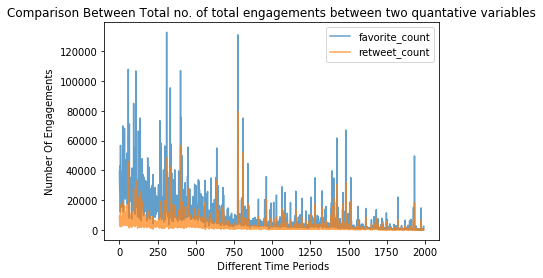

In [184]:
plots_df[['favorite_count','retweet_count']].plot(alpha=0.7);
plt.xlabel(' Different Time Periods');
plt.ylabel('Number Of Engagements');
plt.title('Comparison Between Total no. of total engagements between two quantative variables');

#### Insight:

* I see over the plot here, people tend to interact by using favorite button more than interacting with retweets
* the interaction with retweets was more than favorites only one time in the period before value 250

### Retweets And Favorites correlation

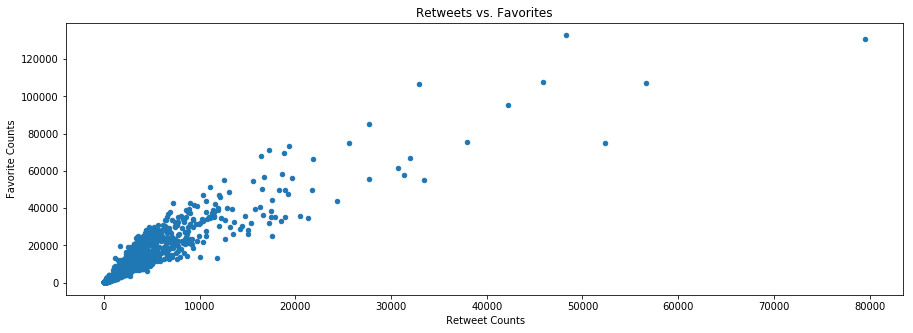

In [185]:
plots_df.plot(x='retweet_count', y='favorite_count', kind='scatter', figsize=(15,5));
plt.xlabel(' Retweet Counts');
plt.ylabel('Favorite Counts');
plt.title('Retweets vs. Favorites');

#### Insight

* though, the favorites engagements is always higher than retweets, there's a strong correlation between them <br>
  as we see here in the period from 0 to 1000 on x-axis and from 0 to 20,000 on y-axis, also there's a small outliers <br>
  in the other regions in the plot

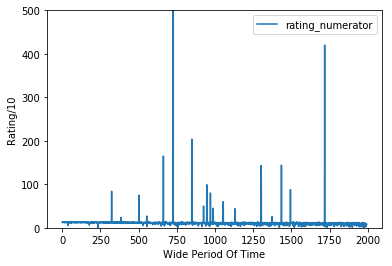

In [186]:
plots_df.plot(y='rating_numerator',ylim=[0,500])
plt.xlabel('Wide Period Of Time')
plt.ylabel('Rating/10');

#### Insight
* We see here, that the people's engagements on WeRateDogs account was very small in the beginnigs and started to grow
  and <br>
  it's clearly that was the time that account created,
* there's a few outliers as the standarized rating is preferable not to exceed extremly high values
* extremely high ratings could be a sign of biasing towards certain type of dog or could be <br>
  a sign that the people are in love with content of the account

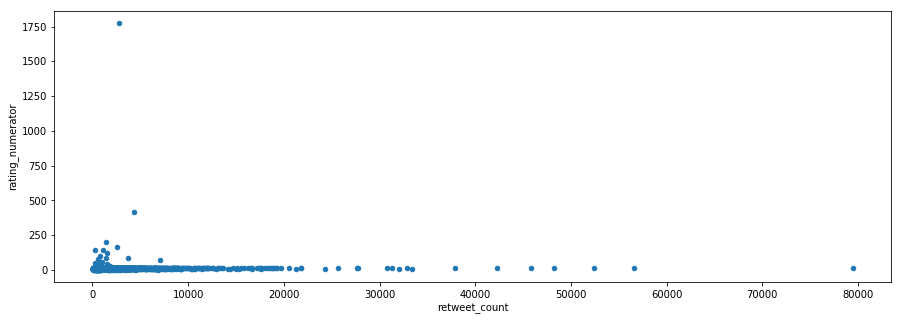

In [187]:
plots_df.plot(x='retweet_count', y='rating_numerator', kind='scatter', figsize=[15,5]);

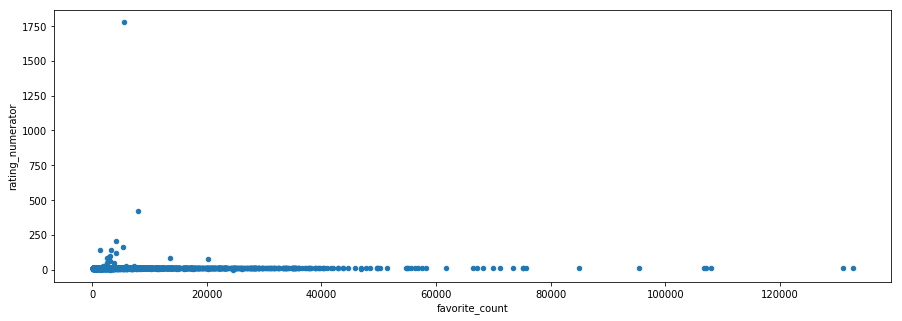

In [188]:
plots_df.plot(x='favorite_count', y='rating_numerator', kind='scatter', figsize=[15,5]);

### Insight:
* we see that the higher ratings tends to have a smaller retweets engagements than that of favorites engagements